<a href="https://colab.research.google.com/github/lblogan14/hands_on_notes/blob/master/Ch10_intro_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##The Perceptron
Perceptron learning rule (weight update):

$w_{i, j}^{(next step)} = w_{i, j} + \eta(\hat{y_j} - y_j)x_i$

* $w_{i, j}$ is the connection weight between the ith input neuron and the jth output neu‐
ron.
* $x_i$ is the ith input value of the current training instance.
* $\hat{y_j}$ is the output of the jth output neuron for the current training instance.
* $y_j$ is the target output of the jth output neuron for the current training instance.
* $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution.

This is called the *Perceptron convergence theorem*.

Use **Perceptron** in sklearn,

In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

[0, 5, 0, 2]

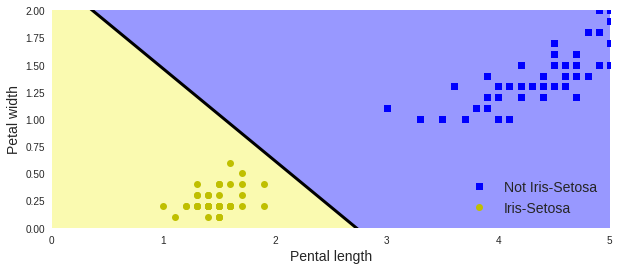

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a*axes[0] + b, a*axes[1] + b], 'k-', linewidth=3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('Pental length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)


The Perceptron learning algorithm strongly resembles Stochastic Gradient Descent.

In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: **loss="perceptron"**, **learning_rate="constant"**, **eta0=1** (the learning rate), and **penalty=None** (no regularization).

##Multi-Layer Perceptron and Backpropagation
###Activation functions

In [0]:
def logit(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
  return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

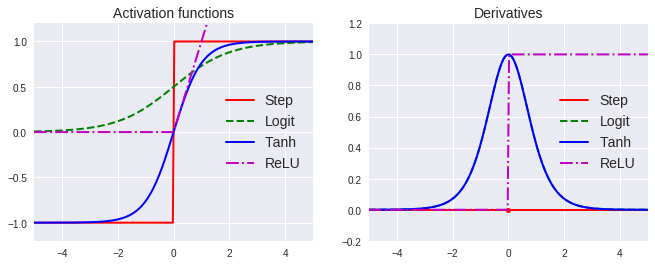

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=2, label='Step')
plt.plot(z, logit(z), 'g--', linewidth=2, label='Logit')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='ReLU')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation functions', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), 'r-', linewidth=2, label='Step')
plt.plot(0, 0, 'ro', markersize=5)
plt.plot(0, 0, 'rx', markersize=10)
plt.plot(z, derivative(np.tanh, z), 'g--', linewidth=2, label='Logit')
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, derivative(relu, z), 'm-.', linewidth=2, label='ReLU')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Derivatives', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

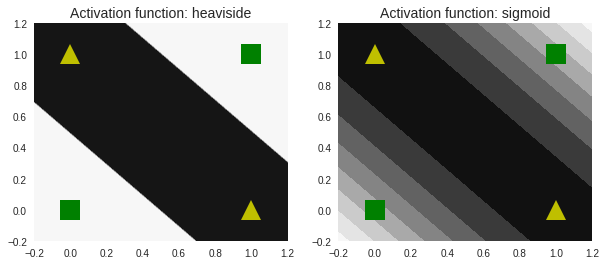

In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

An MLP is often used for classification, with each output corresponding to a different binary class.

When the classes are exclusive (e.g., classes 0 through 9 for digit image classification), the output layer is typically modified by replacing the individual activation functions by a shared softmax function.

The output of each neuron corresponds to the estimated probability of the corresponding class.

#Training an MLP with TensorFlow's High-Level API

Warning: **tf.examples.tutorials.mnist** is deprecated. We will use **tf.keras.datasets.mnist** instead. Moreover, the **tf.contrib.learn** API was promoted to **tf.estimators** and **tf.feature_columns**, and it has changed considerably. In particular, there is no **infer_real_valued_columns_from_input()** function or **SKCompat** class.

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [25]:
feature_cols = [tf.feature_column.numeric_column('X', shape=(28*28))]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train, num_epochs = 40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn = input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpehr0_dnc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8338f19be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, u

In [27]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-28-20:31:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpehr0_dnc/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-28-20:31:30
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9799, average_loss = 0.09936877, global_step = 44000, loss = 12.578326
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpehr0_dnc/model.ckpt-44000


In [28]:
eval_results

{'accuracy': 0.9799,
 'average_loss': 0.09936877,
 'global_step': 44000,
 'loss': 12.578326}

In [29]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpehr0_dnc/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -7.6483994,  -4.211537 ,  -1.0497876,   3.7692795,  -8.089348 ,
         -7.75256  , -16.096601 ,  22.513308 ,  -6.4938126,   3.6641295],
       dtype=float32),
 'probabilities': array([7.9604414e-14, 2.4748437e-12, 5.8435645e-11, 7.2372246e-09,
        5.1219540e-14, 7.1730016e-14, 1.7058059e-17, 1.0000000e+00,
        2.5256189e-13, 6.5148722e-09], dtype=float32)}

#Training a DNN Using Plain TensorFlow
Implement Mini-batch Gradient Descent to train it on the MNIST dataset. The first step is the construction phase, building the TensorFlow graph. The second step is the execution phase, where you actually run the graph to train the model.

##Construction Phase

In [0]:
n_inputs = 28*28 #MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

In [0]:
def neuron_layer(X, n_neurons, name, activation=None):
  with tf.name_scope(name):
    n_inputs = int(X.get_shape()[1])
    stddev = 2 / np.sqrt(n_inputs)
    init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
    W = tf.Variable(init, name='kernel')
    b = tf.Variable(tf.zeros([n_neurons]), name='bias')
    Z = tf.matmul(X, W) + b
    if activation is not None:
      return activation(Z)
    else:
      return Z

In [0]:
with tf.name_scope('dnn'):
  hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
  hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
  logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [0]:
with tf.name_scope('loss'):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  loss = tf.reduce_mean(xentropy, name='loss')

**sparse_softmax_cross_entropy_with_logits()**: it computes the cross entropy based on the “logits” (i.e., the output of the network before going through the softmax activation function), and it expects labels in the form of integers ranging from 0 to the number of classes minus 1 (in our case, from 0 to 9). This will give us a 1D tensor containing the cross entropy for each instance.

**reduce_mean()** function to compute the mean cross entropy over all instances.

The **sparse_softmax_cross_entropy_with_logits()** function is equivalent to applying the softmax activation function and then
computing the cross entropy, but it is more efficient, and it properly takes care of corner cases like logits equal to 0. This is why we
did not apply the softmax activation function earlier. There is also another function called **softmax_cross_entropy_with_logits()**,
which takes labels in the form of one-hot vectors (instead of ints from 0 to the number of classes minus 1).

In [0]:
learning_rate = 0.01

with tf.name_scope('train'):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope('eval'):
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

**in_top)k()** :for each instance, determine if the neural network’s prediction is correct by checking whether or not the highest logit corresponds to the target class. This returns a 1D tensor full of boolean values, so we need to cast these booleans to floats and then compute the average. This will give us the network’s overall accuracy.

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

##Execution Phase

In [0]:
n_epochs = 40
batch_size = 50

In [0]:
def shuffle_batch(X, y, batch_size):
  rnd_idx = np.random.permutation(len(X))
  n_batches = len(X) // batch_size
  
  #array_split allows indices_or_sections to be an integer that does not equally divide the axis
  for batch_idx in np.array_split(rnd_idx, n_batches):
    X_batch, y_batch = X[batch_idx], y[batch_idx]
    yield X_batch, y_batch

In [43]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    acc_batch = accuracy.eval(feed_dict={X: X_batch, y:y_batch})
    acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
    print(epoch, 'Batch accuracy', acc_batch, 'Val Accuracy:', acc_val)
    
  save_path = saver.save(sess, './my_model_final.ckpt')

0 Batch accuracy 0.94 Val Accuracy: 0.9132
1 Batch accuracy 0.96 Val Accuracy: 0.9338
2 Batch accuracy 1.0 Val Accuracy: 0.9398
3 Batch accuracy 0.88 Val Accuracy: 0.948
4 Batch accuracy 1.0 Val Accuracy: 0.9542
5 Batch accuracy 0.96 Val Accuracy: 0.9586
6 Batch accuracy 0.96 Val Accuracy: 0.9612
7 Batch accuracy 1.0 Val Accuracy: 0.9628
8 Batch accuracy 1.0 Val Accuracy: 0.9644
9 Batch accuracy 0.98 Val Accuracy: 0.966
10 Batch accuracy 0.94 Val Accuracy: 0.9676
11 Batch accuracy 0.96 Val Accuracy: 0.9696
12 Batch accuracy 0.96 Val Accuracy: 0.9702
13 Batch accuracy 0.98 Val Accuracy: 0.9696
14 Batch accuracy 1.0 Val Accuracy: 0.9728
15 Batch accuracy 0.98 Val Accuracy: 0.972
16 Batch accuracy 0.94 Val Accuracy: 0.9734
17 Batch accuracy 1.0 Val Accuracy: 0.9748
18 Batch accuracy 1.0 Val Accuracy: 0.9752
19 Batch accuracy 1.0 Val Accuracy: 0.9748
20 Batch accuracy 1.0 Val Accuracy: 0.9754
21 Batch accuracy 1.0 Val Accuracy: 0.9762
22 Batch accuracy 0.98 Val Accuracy: 0.9772
23 Batch ac

In [46]:
# To restore the model
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [47]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [0]:
from tensorflow_graph_in_jupyter import show_graph

In [0]:
show_graph(tf.get_default_graph())

##Using **dense()** instead of **neuron_layer()**
Note: previous releases of the book used **tensorflow.contrib.layers.fully_connected()** rather than **tf.layers.dense()** (which did not exist when this chapter was written). It is now preferable to use **tf.layers.dense()**, because anything in the contrib module may change or be deleted without notice. The **dense()** function is almost identical to the **fully_connected()** function, except for a few minor differences:

* several parameters are renamed: **scope** becomes **name**, **activation_fn** becomes **activation** (and similarly the **_fn** suffix is removed from other parameters such as **normalizer_fn**), **weights_initializer** becomes **kernel_initializer**, etc.
* the default activation is now **None** rather than **tf.nn.relu**.
* a few more differences are presented in chapter 11.

In [0]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [0]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [56]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.92 Validation accuracy: 0.9044
1 Batch accuracy: 0.94 Validation accuracy: 0.924
2 Batch accuracy: 0.92 Validation accuracy: 0.934
3 Batch accuracy: 0.84 Validation accuracy: 0.9422
4 Batch accuracy: 0.92 Validation accuracy: 0.9462
5 Batch accuracy: 0.94 Validation accuracy: 0.9478
6 Batch accuracy: 0.94 Validation accuracy: 0.9532
7 Batch accuracy: 1.0 Validation accuracy: 0.957
8 Batch accuracy: 0.96 Validation accuracy: 0.9592
9 Batch accuracy: 0.94 Validation accuracy: 0.9622
10 Batch accuracy: 0.98 Validation accuracy: 0.9636
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.92 Validation accuracy: 0.9672
13 Batch accuracy: 0.92 Validation accuracy: 0.9688
14 Batch accuracy: 0.96 Validation accuracy: 0.9678
15 Batch accuracy: 1.0 Validation accuracy: 0.9708
16 Batch accuracy: 1.0 Validation accuracy: 0.9712
17 Batch accuracy: 0.96 Validation accuracy: 0.9718
18 Batch accuracy: 1.0 Validation accuracy: 0.9702
19 Batch accuracy: 1.0 Valida

In [0]:
show_graph(tf.get_default_graph())